## Gradient Boosting 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
df=pd.DataFrame()

In [6]:
np.random.seed(42)

In [7]:
X=np.random.rand(100,1)-0.5

In [8]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [9]:
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [10]:

y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [14]:
df["X"]=X.reshape(100)

In [15]:
df["y"]=y

In [16]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

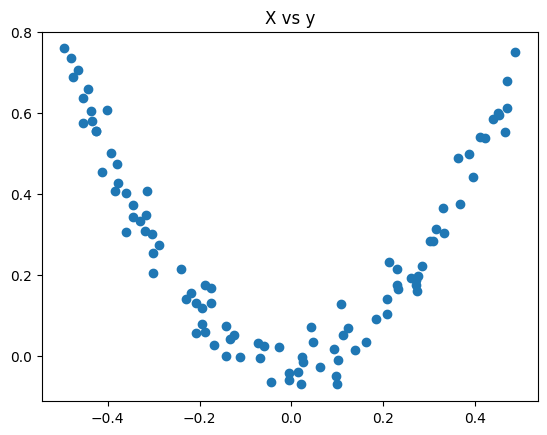

In [17]:
plt.scatter(df["X"],df["y"])
plt.title("X vs y")

In [18]:
df["Base_model"]=df["y"].mean()

In [21]:
df.head()

,X,y,Base_model
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [22]:
df["Res1"]=df["y"]-df["Base_model"]

In [23]:
df.head()

,X,y,Base_model,Res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


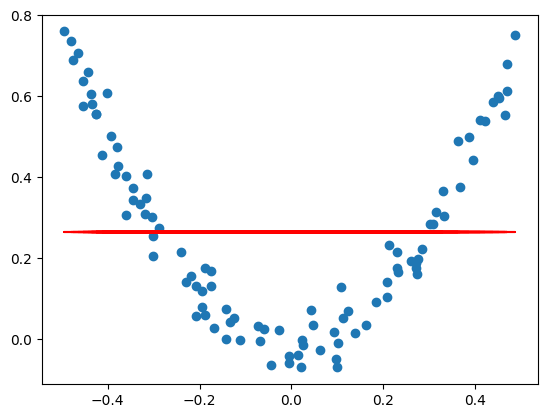

In [24]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["Base_model"],color="red")

In [25]:
X=df["X"].values.reshape(100,1)

In [ ]:
X

In [31]:
y=df["Res1"].values

In [32]:
y

array([-0.2138855 ,  0.32902139, -0.09940679, -0.33563635,  0.07852754,
        0.10741654,  0.39430659,  0.110883  , -0.27521034, -0.16066366,
        0.46982939,  0.41342497,  0.03960792,  0.00845134,  0.04310154,
        0.08367197, -0.18559775, -0.28000286, -0.27116936, -0.20787833,
       -0.21311917,  0.1374884 , -0.13559118, -0.22361028, -0.33043739,
       -0.04251468, -0.01200661, -0.3049644 , -0.24790132,  0.37186583,
       -0.13645142,  0.06893355,  0.31495947,  0.33531398,  0.28904261,
        0.01854268, -0.14791955,  0.34330689, -0.17325102, -0.23963586,
        0.1613713 , -0.32382251,  0.44206489,  0.27476783, -0.05134551,
       -0.23168729, -0.08896052, -0.33434277, -0.22956999,  0.14201453,
        0.34654395, -0.06667907,  0.31900213,  0.17703373, -0.31423835,
        0.27190336,  0.18944168,  0.03550048,  0.30902505, -0.0964332 ,
       -0.26744282, -0.12471768,  0.09942251, -0.26544278, -0.11011633,
       -0.19463239,  0.04097368,  0.01774234,  0.29055721,  0.48

In [33]:
from sklearn.tree import DecisionTreeRegressor
Dt1=DecisionTreeRegressor(max_leaf_nodes=8)

In [34]:
Dt1.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [35]:
from sklearn.tree import plot_tree

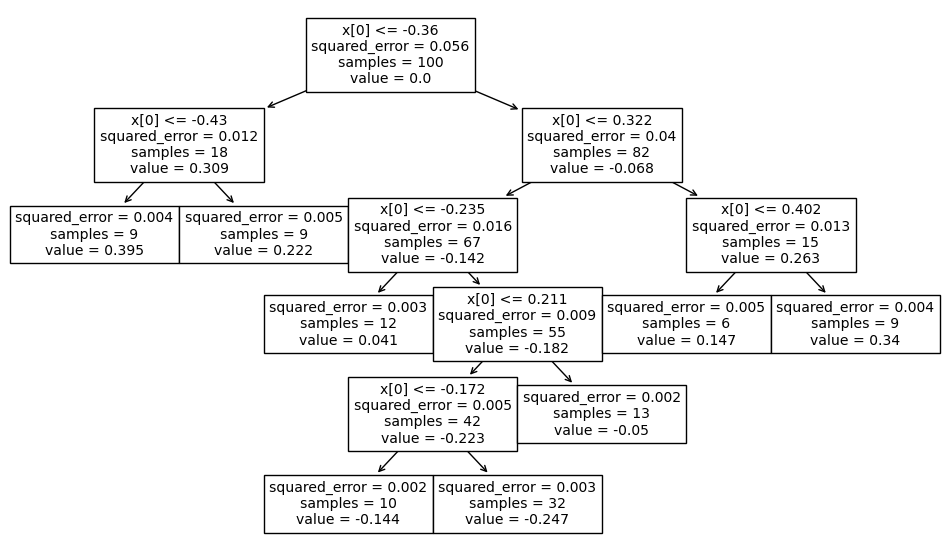

In [37]:
plt.figure(figsize=[12,7])
plot_tree(Dt1)
plt.show()

In [51]:
X_test=np.linspace(-0.5,0.5,500)

In [52]:
X_test

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [53]:
Base=df["Base_model"]

In [54]:
alpha=0.1

In [55]:
# y_pred without alpha
y_pred=Base[0]+(Dt1.predict(X_test.reshape(500,1)))

In [56]:
# with alpha 
y_pred1=Base[0]+(alpha*(Dt1.predict(X_test.reshape(500,1))))

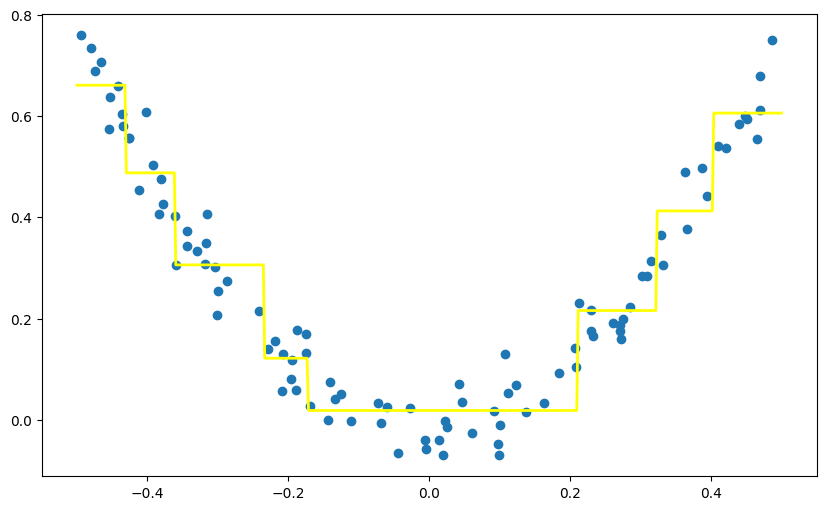

In [58]:
plt.figure(figsize=[10,6])
plt.plot(X_test,y_pred,linewidth=2,color="yellow")
plt.scatter(df["X"],df["y"])
plt.show()

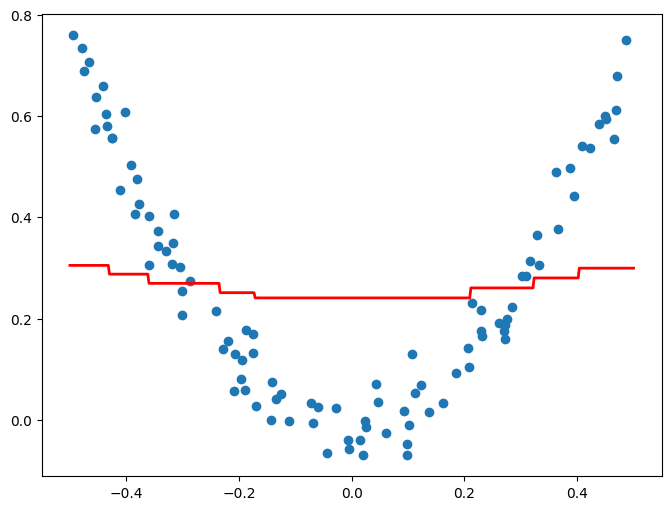

In [59]:
# plot of prediction  with data 
plt.figure(figsize=[8,6])
plt.plot(X_test,y_pred1,linewidth=2,color="red")
plt.scatter(df["X"],df["y"])
plt.show()

In [60]:
Dt1.score(X,y)

0.94048065003866

In [61]:
df.head()

,X,y,Base_model,Res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


In [62]:
df["pred2"]=Dt1.predict(X)

In [63]:
df.head()

,X,y,Base_model,Res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506


In [66]:
df["Res2"]=df["y"]-(Base+(alpha*df["pred2"]))

In [67]:
df.head()

,X,y,Base_model,Res1,pred2,Res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477


In [68]:
X=df["X"].values.reshape(100,1)

In [70]:
y=df["Res2"].values

In [71]:
from sklearn.tree import DecisionTreeRegressor
Dt2=DecisionTreeRegressor(max_leaf_nodes=8)

In [72]:
Dt2.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=8)

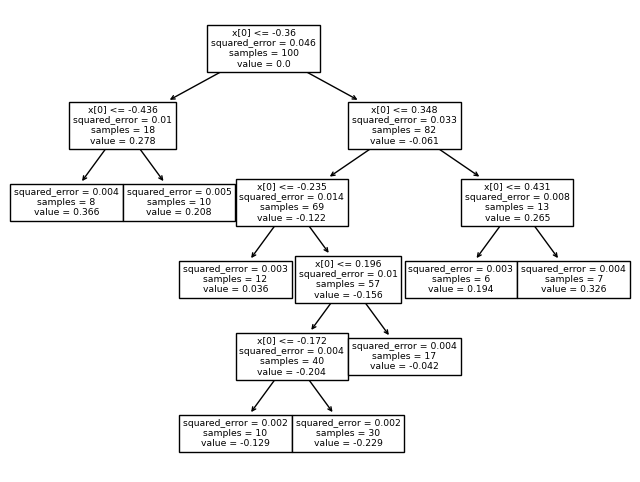

In [74]:
plt.figure(figsize=[8,6])
plot_tree(Dt2)
plt.show()

In [76]:
# final_pred=Base+(alpha*Dt1)+(alpha*Dt2)

In [77]:
alpha=0.1

In [78]:
query=[[0.45071431]]

In [79]:
pred1=Dt1.predict(query)

In [80]:
pred1

array([0.34042552])

In [81]:
pred2=Dt2.predict(query)

In [82]:
pred2

array([0.32555151])

In [87]:
final_pred=Base[0]+(alpha*pred1)+(alpha*pred2)

In [88]:
final_pred

array([0.3320561])